In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import normalize
from tensorflow.keras.callbacks import EarlyStopping

import matplotlib.pyplot as plt

In [2]:
mnist = tf.keras.datasets.mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

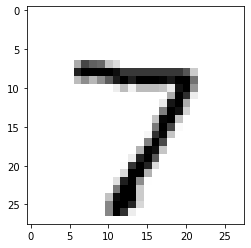

7

In [11]:
plt.imshow(X_test[0], cmap = plt.cm.binary)
plt.show()

y_test[0]

In [3]:
X_train_n = normalize(X_train, axis = 1)
X_test_n = normalize(X_test, axis = 1)

In [4]:
# from tensorflow.keras.callbacks import EarlyStopping

model = Sequential()

model.add(Flatten(input_shape = (28, 28))) 
# input_shape = X_train.shape[1:]
model.add(Dense(32, activation = 'relu'))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

model.compile(optimizer = 'adam',
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])

In [6]:
model.fit(X_train_n, y_train, epochs = 10, callbacks = [EarlyStopping(monitor = 'loss', patience = 3)])

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 6s 106us/sample - loss: 0.0518 - accuracy: 0.9843
Epoch 2/10
60000/60000 [==============================] - 5s 90us/sample - loss: 0.0466 - accuracy: 0.9853
Epoch 3/10
60000/60000 [==============================] - 5s 89us/sample - loss: 0.0435 - accuracy: 0.9860
Epoch 4/10
60000/60000 [==============================] - 6s 103us/sample - loss: 0.0408 - accuracy: 0.9869
Epoch 5/10
60000/60000 [==============================] - 5s 89us/sample - loss: 0.0376 - accuracy: 0.9879
Epoch 6/10
60000/60000 [==============================] - 6s 99us/sample - loss: 0.0349 - accuracy: 0.9888
Epoch 7/10
60000/60000 [==============================] - 6s 95us/sample - loss: 0.0313 - accuracy: 0.9898
Epoch 8/10
60000/60000 [==============================] - 6s 97us/sample - loss: 0.0289 - accuracy: 0.9908
Epoch 9/10
60000/60000 [==============================] - 6s 104us/sample - loss: 0.0276 - accuracy: 0.9915
Epoch 10/10

In [7]:
val_loss, val_acc = model.evaluate(X_test_n, y_test)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [33]:
print(val_loss)
print(val_acc)

0.12161823169486598
0.9655


In [51]:
model.save('numpred.h5')

In [52]:
new_model = tf.keras.models.load_model('numpred.h5')

In [37]:
vl, va = new_model.evaluate(X_test_n, y_test)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [38]:
print(vl)
print(va)

0.12117395554324611
0.9655


In [39]:
predictions = model.predict(X_test_n)

In [41]:
print(predictions[0])

[2.0580167e-10 1.6196749e-10 2.7797914e-05 2.9349152e-04 1.2298445e-11
 2.3847073e-07 2.1799438e-17 9.9967146e-01 1.7565579e-07 6.8380573e-06]


In [42]:
import numpy as np
print(np.argmax(predictions[0]))

7


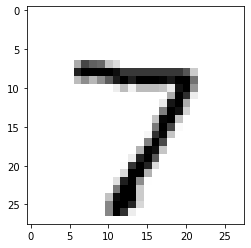

In [53]:
plt.imshow(X_test[0], cmap = 'binary')
plt.show()